#**Mathematical Implementation of PCA**

Creating Dataset

In [3]:
import numpy as np
X=np.array([[1,3,5,7,9,13,20,20,21,24,26],[5,7,11,14,15,17,18,19,21,22,26]]) #2row 11 col(2D array)
X=X.T #tranpose of X
print(X) #Dataset-> 2feature(x1,x2) & 11 sample

[[ 1  5]
 [ 3  7]
 [ 5 11]
 [ 7 14]
 [ 9 15]
 [13 17]
 [20 18]
 [20 19]
 [21 21]
 [24 22]
 [26 26]]


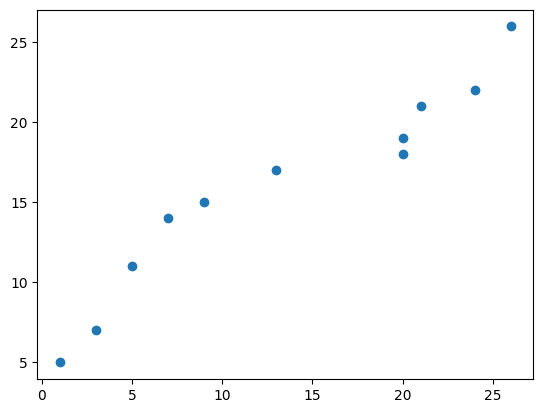

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1]) #X[all rows:col number]
plt.show()

Normalise Data (shift mean to 0)

[[-12.54545455 -10.90909091]
 [-10.54545455  -8.90909091]
 [ -8.54545455  -4.90909091]
 [ -6.54545455  -1.90909091]
 [ -4.54545455  -0.90909091]
 [ -0.54545455   1.09090909]
 [  6.45454545   2.09090909]
 [  6.45454545   3.09090909]
 [  7.45454545   5.09090909]
 [ 10.45454545   6.09090909]
 [ 12.45454545  10.09090909]]


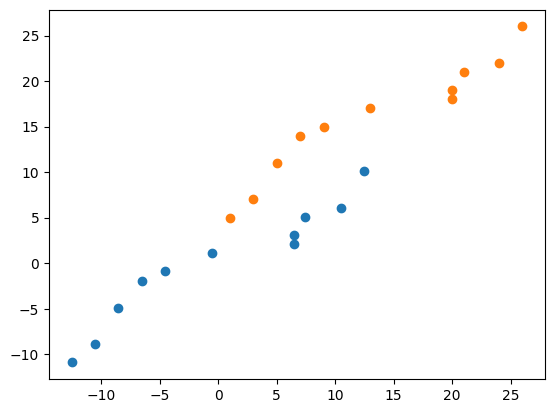

In [5]:
#taking mean of each col and subtract with each data
X_meaned=X-np.mean(X,axis=0) #axis=0 for col
print(X_meaned)
plt.figure()
plt.scatter(X_meaned[:,0],X_meaned[:,1])
plt.scatter(X[:,0],X[:,1])
plt.show()
#Mean of blue=0
#blue=Normalised Dataset
#orange=Original Dataset

Calculate **Co-Variance Matrix**

In [6]:
C=np.cov(X_meaned,rowvar=False) #rowvar=False for col
print(C) #2x2 Symmetric Matrix

[[80.87272727 54.95454545]
 [54.95454545 40.69090909]]


Calculate **EigenValue** & **EigenVcetor**

In [9]:
eval,evec=np.linalg.eig(C) # Calculate eigenvalues and eigenvectors of the covariance matrix
print(eval) # Print the eigenvalues
print(evec) # Print the eigenvectors

[119.29375452   2.26988184]
[[ 0.81956216 -0.57299028]
 [ 0.57299028  0.81956216]]


**Biggest Eigen Value** give Principal Eigen Vector(PEV)

Data projected in that PEV has **MAX VARIANCE**

In [10]:
#sort eigen value and eigen vector in des order
sorted_index=np.argsort(eval)[::-1] # Get the indices that would sort the eigenvalues in descending order
sorted_eval=eval[sorted_index] # Sort the eigenvalues in descending order
sorted_evec=evec[:,sorted_index] # Sort the eigenvectors based on the sorted eigenvalue indices
print(sorted_eval) # Print the sorted eigenvalues
print(sorted_evec) # Print the sorted eigenvectors

[119.29375452   2.26988184]
[[ 0.81956216 -0.57299028]
 [ 0.57299028  0.81956216]]


2Dimensionality-> 1Dimensionality

In [12]:
n=1
evec_subset=sorted_evec[:,0:n] # take only first(largest) eigen Vector
print(evec_subset) #eigen vector corresponding to Biggest eigen Value

[[0.81956216]
 [0.57299028]]


Transform the data

In [16]:
#project datapoint on line in dirn of above eigen vector->largest eigen value
X_reduced=np.dot(evec_subset.T,X_meaned.T).T
print(X_reduced) #2D->1D

[[-16.53258291]
 [-13.74747803]
 [ -9.81639259]
 [ -6.45829743]
 [ -4.24618282]
 [  0.17804639]
 [  6.48797183]
 [  7.0609621 ]
 [  9.02650482]
 [ 12.05818159]
 [ 15.98926703]]


#**Direct Method to Calculate PCA**

In [17]:
from sklearn.decomposition import PCA
pca=PCA(n_components=1) #object of PCA , (2D->1D) as n=1
pca.fit(X_meaned) # learn Principle Eigen Vector
Xr=pca.transform(X_meaned) #project original data to reduced dimensional Space
print(Xr)

[[-16.53258291]
 [-13.74747803]
 [ -9.81639259]
 [ -6.45829743]
 [ -4.24618282]
 [  0.17804639]
 [  6.48797183]
 [  7.0609621 ]
 [  9.02650482]
 [ 12.05818159]
 [ 15.98926703]]


#**Iris Dataset(4D->2D using PCA)**

In [22]:
from sklearn import datasets
iris=datasets.load_iris()

In [24]:
iris.get("feature_names")

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [26]:
iris.data #150x4 Matrix (feature=4 Sample=150)

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [28]:
iris.target #output(which Class)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [29]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2) #object of PCA , (4D->2D) as n=2
pca.fit(iris.data) # learn Principle Eigen Vector
Xr=pca.transform(iris.data) #project original data to reduced dimensional Space
print(Xr)

[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]
 [-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]
 [-2.88638273 -0.57831175]
 [-2.6727558  -0.11377425]
 [-2.50694709  0.6450689 ]
 [-2.61275523  0.01472994]
 [-2.78610927 -0.235112  ]
 [-3.22380374 -0.51139459]
 [-2.64475039  1.17876464]
 [-2.38603903  1.33806233]
 [-2.62352788  0.81067951]
 [-2.64829671  0.31184914]
 [-2.19982032  0.87283904]
 [-2.5879864   0.51356031]
 [-2.31025622  0.39134594]
 [-2.54370523  0.43299606]
 [-3.21593942  0.13346807]
 [-2.30273318  0.09870885]
 [-2.35575405 -0.03728186]
 [-2.50666891 -0.14601688]
 [-2.46882007  0.13095149]
 [-2.56231991  0.36771886]
 [-2.63953472  0.31203998]
 [-2.63198939 -0.19696122]
 [-2.58739848 -0.20431849]
 [-2.4099325   0.41092426]
 [-2.64886233  0.81336382]
 [-2.59873675  1.09314576]
 [-2.63692688 -0.12132235]
 [-2.86624165  0.06936447]
 [-2.62523805  0.59937002]
 

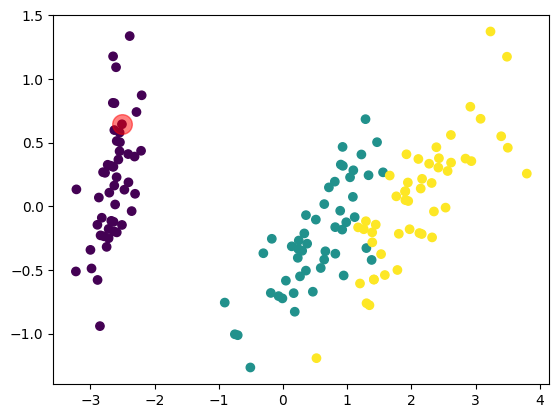

In [33]:
plt.scatter(Xr[:,0],Xr[:,1],c=iris.target)
plt.scatter([Xr[10][0]],[Xr[10][1]],s=[200],c=["r"],alpha=0.5)
#diffrent color->diff Class